In [10]:
import numpy as np
import pandas as pd

In [11]:
mcdonalds= pd.read_csv('mcdonalds.csv')

In [12]:
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [13]:
Mx = (mcdonalds.iloc[:, 0:11] == 'Yes').astype(int)
print(Mx.mean().round(2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [14]:
from sklearn.decomposition import PCA
Mpca = PCA(n_components=len(Mx.columns))
Mpca.fit(Mx)
print(Mpca.explained_variance_ratio_)
print(Mpca.components_.round(1))

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


In [18]:
from sklearn.cluster import KMeans
for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=1234).fit(Mx)
    print(f'Number of clusters: {k}, Inertia: {km.inertia_:.2f}')

Number of clusters: 2, Inertia: 2145.50
Number of clusters: 3, Inertia: 1818.72
Number of clusters: 4, Inertia: 1602.99
Number of clusters: 5, Inertia: 1435.32
Number of clusters: 6, Inertia: 1332.15
Number of clusters: 7, Inertia: 1249.23
Number of clusters: 8, Inertia: 1191.58


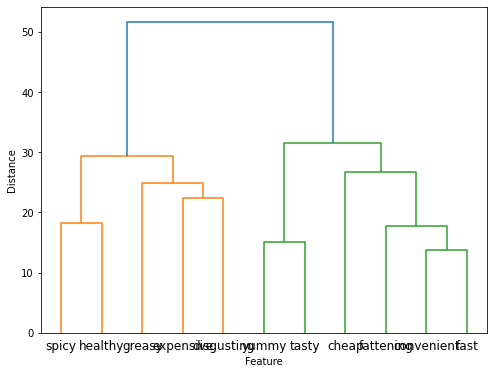

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
Mhc = linkage(Mx.T, method='ward')
plt.figure(figsize=(8, 6))
dendrogram(Mhc, labels=Mx.columns)
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.show()

In [21]:
from sklearn.mixture import GaussianMixture
ggm = GaussianMixture(n_components=4, random_state=1234)
ggm.fit(Mx)
print(ggm.bic(Mx))
print(ggm.means_.round(2))
print(ggm.covariances_.round(2))

-25216.896818526544
[[0.81 1.   0.09 0.82 0.42 0.96 0.89 1.   0.   0.29 0.07]
 [0.   0.72 0.11 0.92 0.69 0.76 0.09 0.22 1.   0.07 0.59]
 [0.   0.85 0.06 0.9  0.59 0.92 0.83 0.02 0.   0.08 0.43]
 [1.   0.93 0.12 0.88 0.55 0.88 0.22 0.84 0.88 0.24 0.13]]
[[[ 0.15  0.   -0.01 -0.01 -0.01  0.    0.01  0.    0.    0.03 -0.02]
  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
  [-0.01  0.    0.08 -0.01 -0.    0.    0.    0.    0.    0.    0.01]
  [-0.01  0.   -0.01  0.14  0.06 -0.    0.    0.    0.   -0.07  0.01]
  [-0.01  0.   -0.    0.06  0.24 -0.   -0.    0.    0.   -0.05  0.03]
  [ 0.    0.    0.   -0.   -0.    0.04  0.    0.    0.   -0.   -0.  ]
  [ 0.01  0.    0.    0.   -0.    0.    0.1   0.    0.    0.01 -0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
  [ 0.03  0.    0.   -0.07 -0.05 -0.    0.01  0.    0.    0.2  -0.01]
  [-0.02  0.    0.01  0.01  0.03 -0.   -0.    0

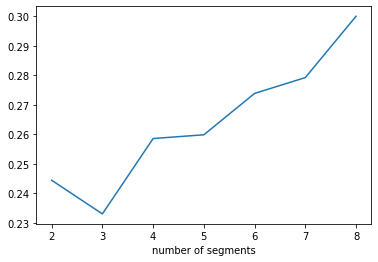

In [36]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1234)

X = Mx

# Perform k-means clustering for 2 to 8 clusters
scores = []
labels = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(X)
    labels.append(kmeans.labels_)
    scores.append(silhouette_score(X, kmeans.labels_))

# Relabel the clusters to match the order of the scores
MD_km28 = labels[np.argmax(scores)]

# Plot the number of segments
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(2, 9), scores)
plt.xlabel("number of segments")
plt.show()



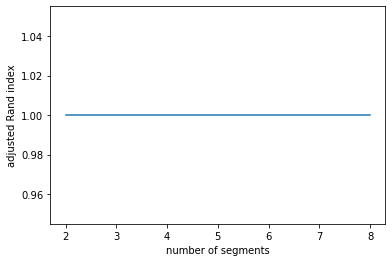

In [37]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt

np.random.seed(1234)

results = []
for n_clusters in range(2, 9):
    agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clust.fit_predict(Mx)
    ari = adjusted_rand_score(labels, labels)
    results.append(ari)

plt.figure()
plt.plot(range(2, 9), results)
plt.xlabel("number of segments")
plt.ylabel("adjusted Rand index")
plt.show()

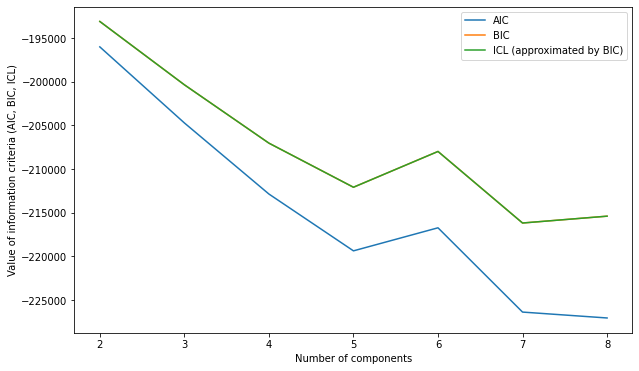

mixture    0    1    2    3
kmeans                     
0         86    5  266    7
1          0  211   24    5
2        466    0    5   62
3          0   38    2  276


In [72]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

np.random.seed(1234)

encoder = OneHotEncoder(sparse=False)
Mx_encoded = encoder.fit_transform(Mx)

aic = []
bic = []
icl = []
n_components_range = range(2, 9)
for k in n_components_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
    gmm.fit(Mx_encoded)
    aic.append(gmm.aic(Mx_encoded))
    bic.append(gmm.bic(Mx_encoded))
    icl.append(gmm.bic(Mx_encoded))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic, label='AIC')
plt.plot(n_components_range, bic, label='BIC')
plt.plot(n_components_range, icl, label='ICL (approximated by BIC)')
plt.xlabel('Number of components')
plt.ylabel('Value of information criteria (AIC, BIC, ICL)')
plt.legend()
plt.show()

gmm_selected = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
gmm_selected.fit(Mx_encoded)

kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_clusters = kmeans.fit_predict(Mx_encoded)

gmm_clusters = gmm_selected.predict(Mx_encoded)

comparison_table = pd.crosstab(kmeans_clusters, gmm_clusters, rownames=['kmeans'], colnames=['mixture'])
print(comparison_table)




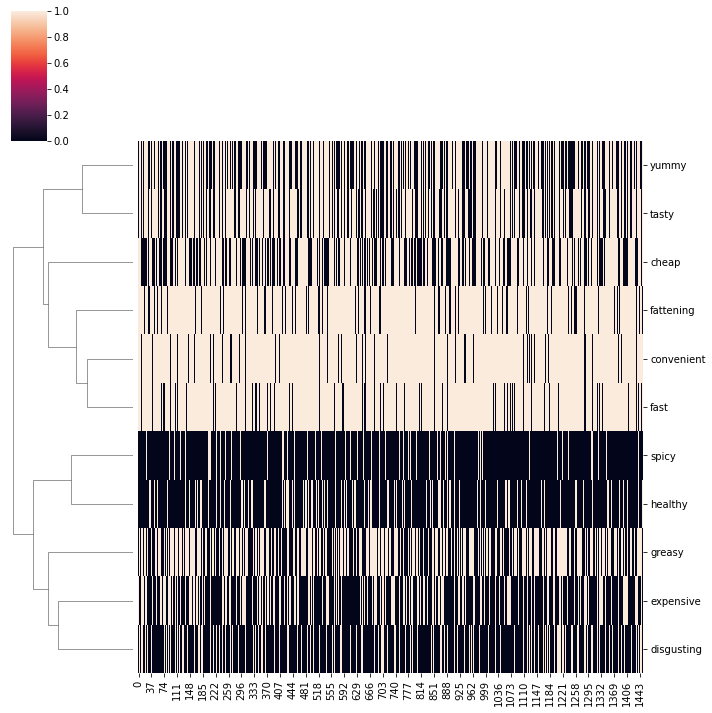

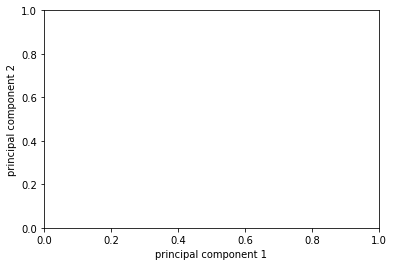

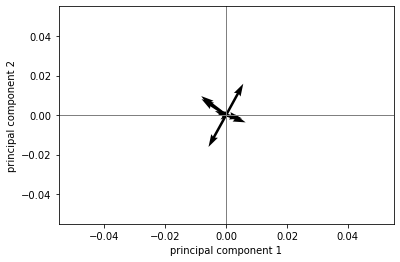

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
from sklearn.decomposition import PCA

MD_x_transposed = Mx.T
MD_vclust = linkage(pdist(MD_x_transposed), method='complete')

sns.clustermap(MD_x_transposed, method='complete', col_cluster=False)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(Mx)

plt.figure()

plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

plt.figure()
plt.quiver(np.zeros(pca.components_.shape[1]), np.zeros(pca.components_.shape[1]),
           pca.components_[0, :], pca.components_[1, :])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()




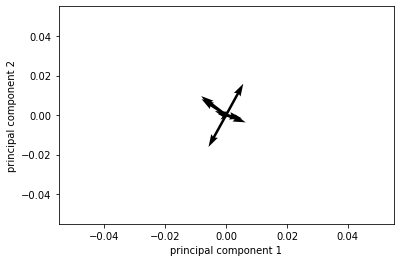

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


MD_x_transposed = Mx.T
MD_vclust = linkage(pdist(MD_x_transposed), method='complete')

order = dendrogram(MD_vclust, no_plot=True)['leaves']

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(Mx)
plt.figure()

plt.quiver(np.zeros(pca.components_.shape[1]), np.zeros(pca.components_.shape[1]),
           pca.components_[0, :], pca.components_[1, :])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

